<a href="https://colab.research.google.com/github/satishchaudhary382/satish/blob/master/Modified%20MACD%20Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#!pip install ta
import ta
from pandas_datareader import data

In [0]:
df = pd.read_csv("/content/nabil.txt", sep = '\t', parse_dates = ['Date'])
df.set_index("Date", inplace = True)

In [0]:
from ta.trend import MACD
m = MACD(df.Close)
df['MACD'] = m.macd()
df['MACD_signal'] = m.macd_signal()
df['MACD_diff'] = m.macd_diff()
from ta.volume import MFIIndicator
mf = MFIIndicator(df.High, df.Low,df.Close, 14)
df['MFI'] = mf.money_flow_index()


No handles with labels found to put in legend.


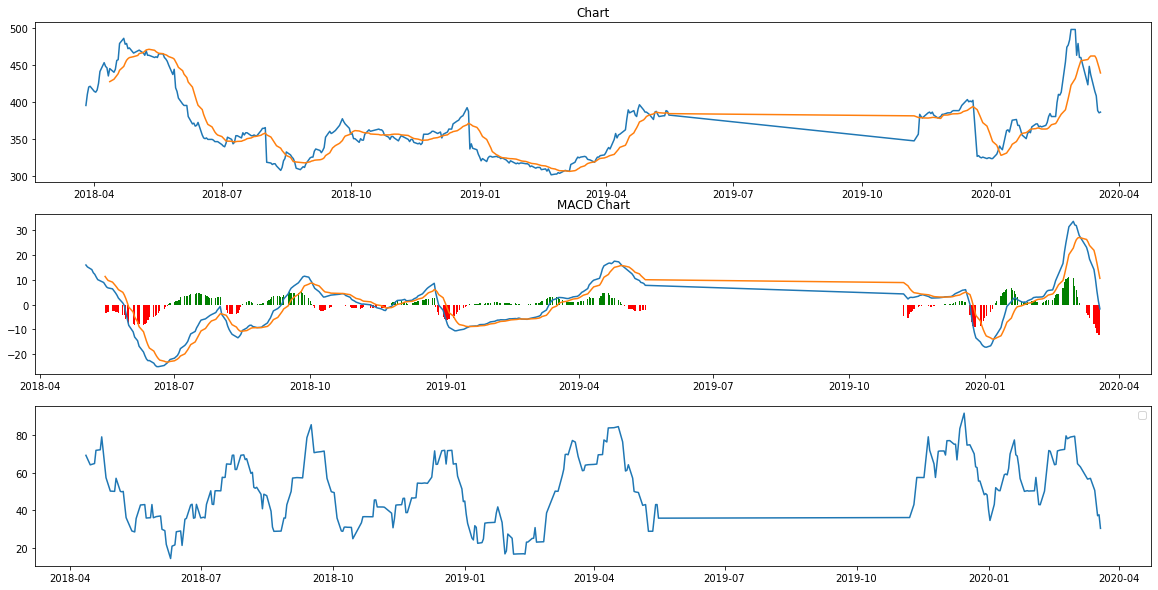

In [368]:
#plt.figure(figsize = (20,10))
fig, axs = plt.subplots(3,figsize = (20,10))
axs[0].plot(df.Close, label = 'Price')
axs[0].plot(df.Close.rolling(14).mean())
axs[0].set_title("Chart")
axs[1].set_title("MACD Chart")
axs[1].plot(df.MACD, label = 'MACD')
axs[1].plot(df.MACD_signal, label = 'Signal line')
axs[1].bar(df.MACD_diff[df.MACD_diff>0].index, df.MACD_diff[df.MACD_diff>0], color = 'green')
axs[1].bar(df.MACD_diff[df.MACD_diff<0].index, df.MACD_diff[df.MACD_diff<0], color = 'red')
axs[2].plot(df.MFI)
plt.legend()

In [0]:
def strategy(df):
  if (df['MACD'] > df['MACD_signal']) and (df['MACD']<0) and (df['MACD_signal']<0) and (df['MFI']<30):
    return 1
  elif (df['MACD'] < df['MACD_signal']) and (df['MACD']>0) and (df['MACD_signal']>0 and (df['MFI']>70)):
    return -1
  else:
    return 0


In [0]:
d = df
s = np.array(d.apply(strategy, axis = 1))

In [0]:
q = []
for i in range(1, len(s)):
  if s[i-1]==s[i]:
    q.append(0)
  else:
    q.append(s[i])


In [0]:
q.insert(-1,0)
signal = np.array(q)

In [387]:
df['signal'] = signal
df.signal.values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0

In [0]:
def text(df):
  if df['signal']== 1:
    return "Buy"
  elif df['signal'] == -1:
    return "Sell"
  else:
    return "Hold"

In [389]:
df['signal_text'] = df.apply(text, axis = 1)
np.array(df['signal_text'])

array(['Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       

In [0]:
def run(buy, sell, b):
  initial_money = b
  for i in range(len(df)):
    if df['signal_text'][i] =="Buy":
      b-=df['Close'][i]*buy
      print(f'At date {df.index[i]} {buy} unit of stock was bought. Balance {b}')
    elif df['signal_text'][i] == "Sell":
      b+=df['Close'][i]*sell
      print(f'At date {df.index[i]} {sell} unit of stock was Sold. Balance {b}')
    else:
      print(f"Hold constant, Balance {b}")
  print(f'The return on investment is {round(((b-initial_money)/initial_money)*100,2)}% over {df.index[-1] - df.index[0]}')

In [391]:
run(100,100, 100000)

Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold constant, Balance 100000
Hold const

In [0]:
def run_test(initial_money):
  bal = initial_money
  stock = 0
  
  for i in range(len(df)):
    if df['signal_text'][i] == "Buy":
      stock += bal//df['Close'][i]
      if (stock>0) and (bal>df['Close'][i]):
        bal -= df['Close'][i]*stock 
        
        print(f"At date {df.index[i]} {stock} unit of stock was bought at price {df['Close'][i]}. Balance {bal} and Stock {stock}")
      else:
        print(f"At date {df.index[i]} not enough money to buy stock at price {df['Close'][i]}. Balance {bal} and Stock {stock}")
    elif df['signal_text'][i] == "Sell":
      if stock >0:
        bal += df['Close'][i]*stock 
        print(f"At date {df.index[i]} {stock} unit of stock was sold at price {df['Close'][i]}. Balance {bal} and Stock {stock}")
        stock -= stock
      else:
        print(f"At date {df.index[i]} not enough unit of stock to sell at price {df['Close'][i]}. Balance {bal} and Stock {stock}")
    else:
      print(f"At date {df.index[i]} Do not take any action Balance {bal}, stock {stock}")

      
  print(f'The return on investment is {round(((bal-initial_money)/initial_money)*100,2)}% over {df.index[-1] - df.index[0]}')
    

In [403]:
run_test(100000)

At date 2018-03-26 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-03-27 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-03-28 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-03-29 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-01 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-02 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-03 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-04 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-05 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-08 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-09 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-10 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-11 00:00:00 Do not take any action Balance 100000, stock 0
At date 2018-04-12 00:00:

In [398]:
df.index[3]+pd.to_timedelta(pd.np.ceil(30), unit="D")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


Timestamp('2018-04-28 00:00:00')

In [399]:
df.index[3]

Timestamp('2018-03-29 00:00:00')